# Reorientation lifetime of vectors

In [1]:
from fishmol import trj, atoms, utils, funcs, style
from cage_data import cage1_info

## Read trajectory file

In [2]:
%%time
cell = cage1_info.cell
traj = trj.Trajectory(timestep = 5, data = "/nobackup/rhtp48/data_ana/cage1-500K.xyz", index = ":", cell = cell)

CPU times: user 2min 12s, sys: 4.57 s, total: 2min 17s
Wall time: 2min 17s


## Vector reorientation dynamics (VRD) of water O-H bonds

Sepearately calculate the O-H bonds

Progress: [■■■■■■■■■■■■■■■■■■■■] 100.0%


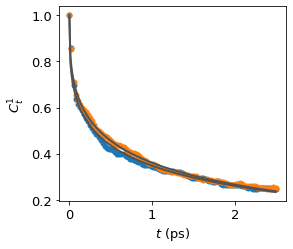

In [186]:
water_vrd = funcs.VRD(traj = traj, spec = [14, [15, 16]], num = 500, sampling = 5, skip = 2)
results = water_vrd.calculate(l = 1, mean = False, fit = True, plot = True)

Average the O-H bonds of the same water molecule

Progress: [■■■■■■■■■■■■■■■■■■■■] 100.0%


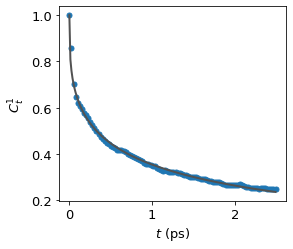

In [187]:
water_vrd = funcs.VRD(traj = traj, spec = [14, [15, 16]], num = 500, sampling = 5, skip = 2)
results = water_vrd.calculate(l = 1, mean = True, fit = True, plot = True)

Plot the results by yourself

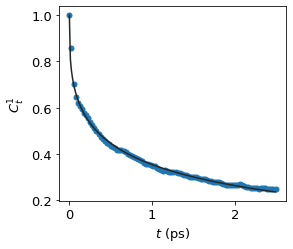

In [190]:
fig, ax = plt.subplots()

ax.scatter(results.t, results.C_t)
ax.plot(results.t_fit, results.C_t_fit, color = "#252525")

ax.set_xlabel(r"$t$ (ps)")
ax.set_ylabel(r"$C^1_t$")
plt.show()

## VRD of trifluoroacetate ion C-C bond

In [ ]:
TFAs = cage1_info.TFAs

In [ ]:
spec = [*TFAs[0].values()]
vrd = funcs.VRD(traj = traj, spec = [[spec[-2],], [spec[-1],]], num = 2000, sampling = 5, skip = 2)
results = vrd.calculate(plot = False, l = 3)